# Correlation Matrices and Heatmaps

<!--
Author: Molla Samser
Website: https://rskworld.in/
Email: help@rskworld.in
Phone: +91 93305 39277
Address: Nutanhat, Mongolkote, Purba Burdwan, West Bengal, India, 713147
-->

This notebook demonstrates correlation analysis and heatmap visualizations:
- Correlation matrices
- Heatmaps with annotations
- Cluster maps
- Custom color schemes


In [1]:
# Author: Molla Samser
# Website: https://rskworld.in/
# Email: help@rskworld.in
# Phone: +91 93305 39277
# Address: Nutanhat, Mongolkote, Purba Burdwan, West Bengal, India, 713147

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 8)

# Load data
df = pd.read_csv('../data/sample_data.csv')
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (30, 9)


,age,income,education_years,experience,gender,category,score,sales,region
0,25,45000,12,2,Male,Category A,75,1200,North
1,30,55000,14,5,Female,Category B,82,1500,South
2,35,65000,16,8,Male,Category A,88,1800,East
3,28,48000,13,3,Female,Category C,70,1100,West
4,32,60000,15,6,Male,Category B,85,1700,North


## 1. Basic Correlation Matrix


In [2]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Select numeric columns for correlation
numeric_cols = ['age', 'income', 'education_years', 'experience', 'score', 'sales']
corr_matrix = df[numeric_cols].corr()

print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                      age    income  education_years  experience     score  \
age              1.000000  0.993800         0.983214    0.989034  0.949555   
income           0.993800  1.000000         0.984108    0.986516  0.957983   
education_years  0.983214  0.984108         1.000000    0.987278  0.949330   
experience       0.989034  0.986516         0.987278    1.000000  0.942111   
score            0.949555  0.957983         0.949330    0.942111  1.000000   
sales            0.980716  0.987460         0.978902    0.981544  0.983144   

                    sales  
age              0.980716  
income           0.987460  
education_years  0.978902  
experience       0.981544  
score            0.983144  
sales            1.000000  


## 2. Basic Heatmap


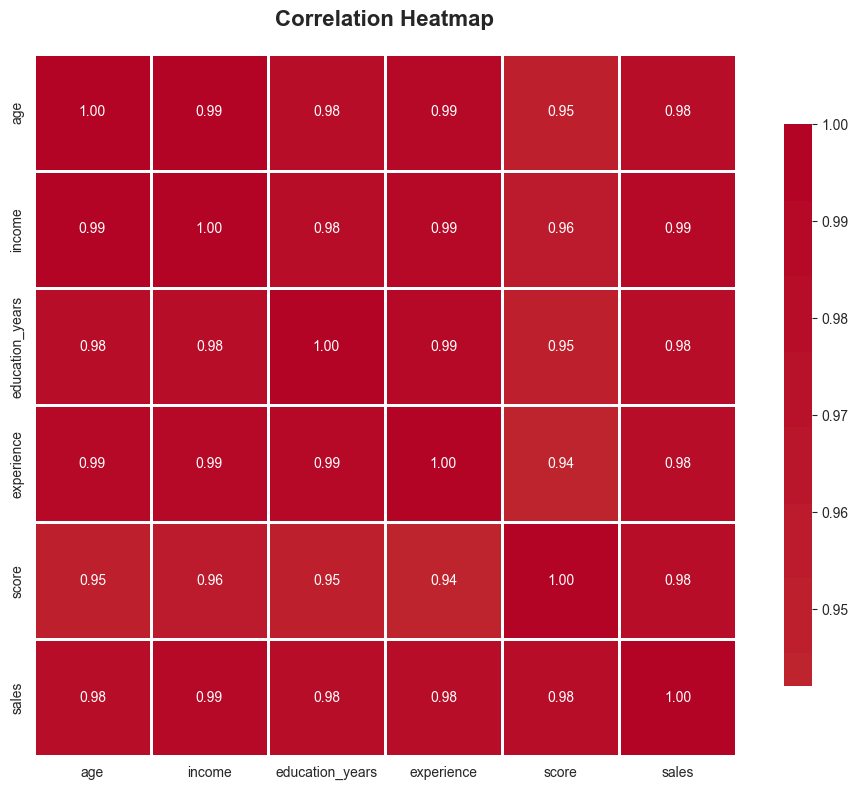

In [3]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Basic heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../images/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


## 3. Heatmap with Custom Color Scheme


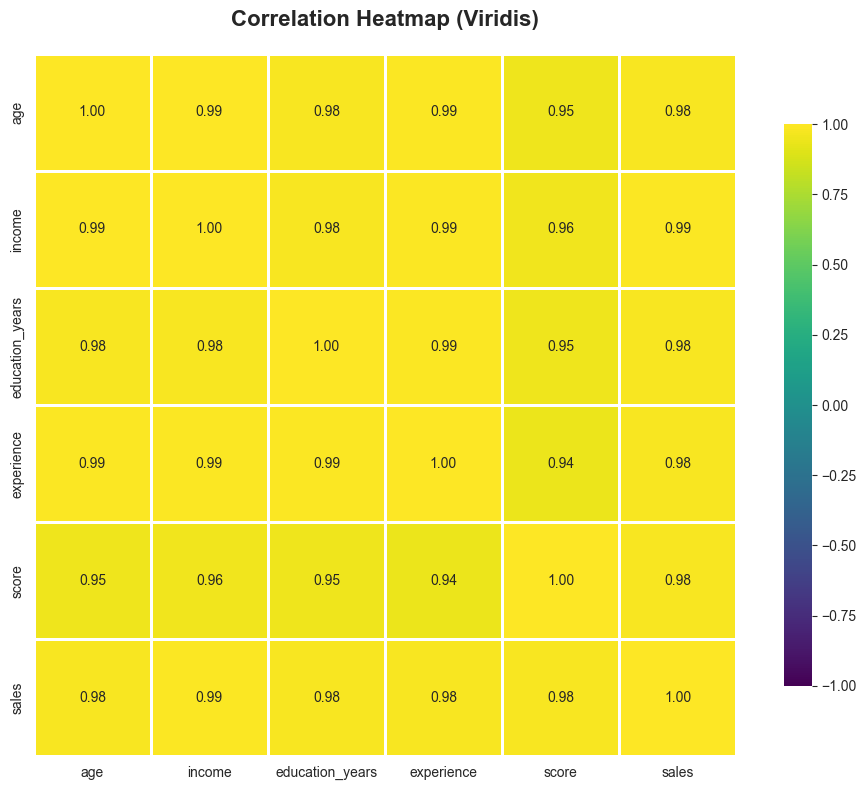

In [4]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Heatmap with different color scheme
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', 
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Viridis)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../images/heatmap_viridis.png', dpi=300, bbox_inches='tight')
plt.show()


## 4. Masked Heatmap (Upper Triangle)


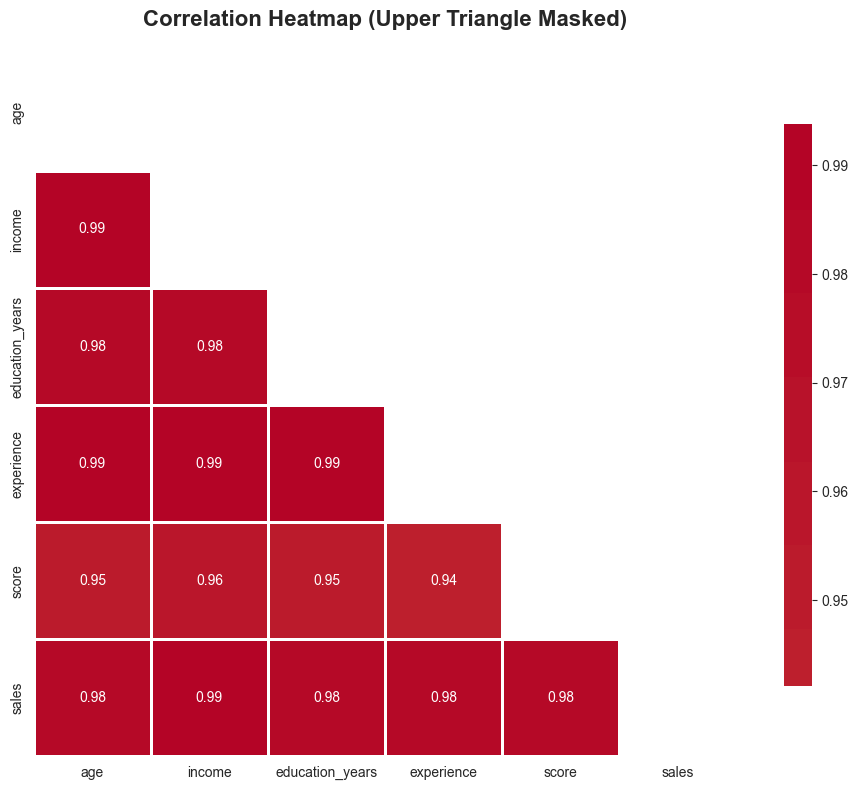

In [5]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, center=0)
plt.title('Correlation Heatmap (Upper Triangle Masked)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../images/heatmap_masked.png', dpi=300, bbox_inches='tight')
plt.show()


## 5. Clustered Heatmap


C:\Users\samse\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


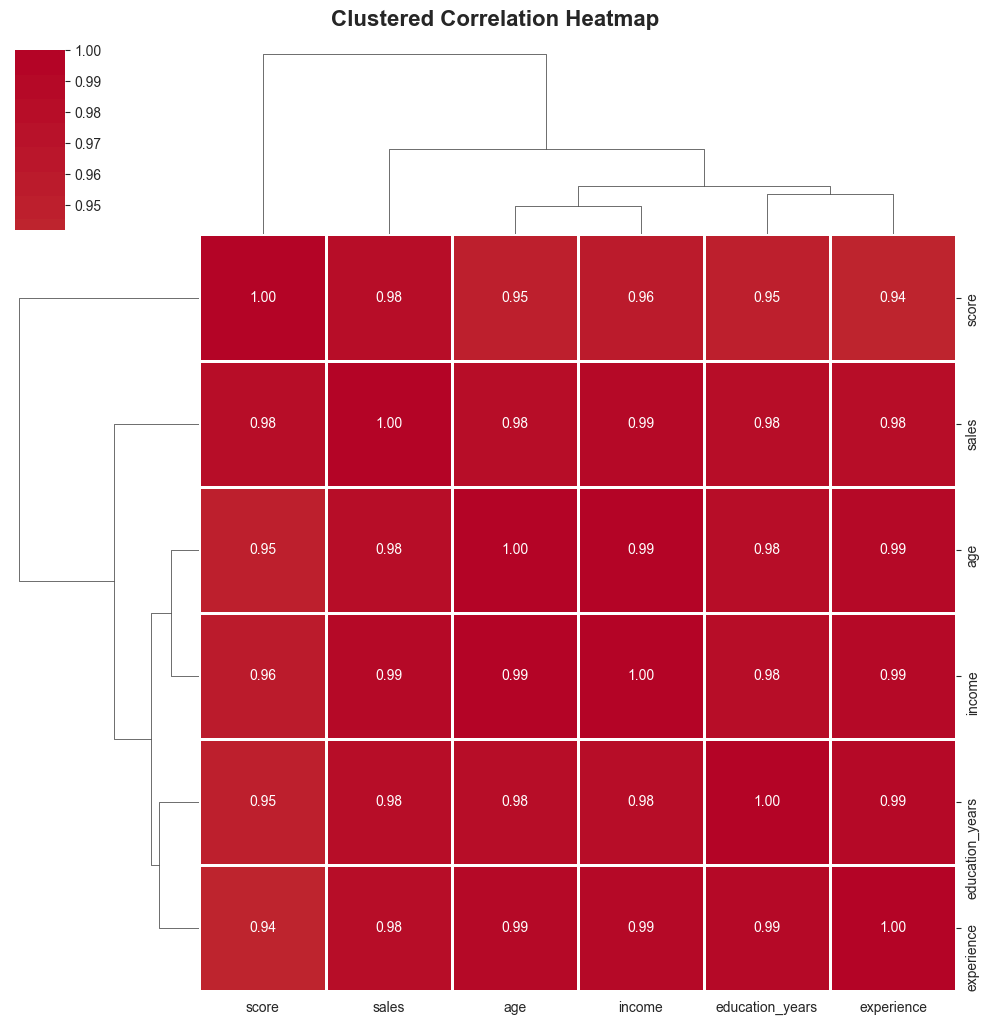

In [6]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Clustermap - clusters similar variables together
g = sns.clustermap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                   figsize=(10, 10), center=0, square=True, linewidths=1)
g.fig.suptitle('Clustered Correlation Heatmap', fontsize=16, fontweight='bold', y=1.02)
plt.savefig('../images/clustermap.png', dpi=300, bbox_inches='tight')
plt.show()


## 6. Correlation with Specific Threshold


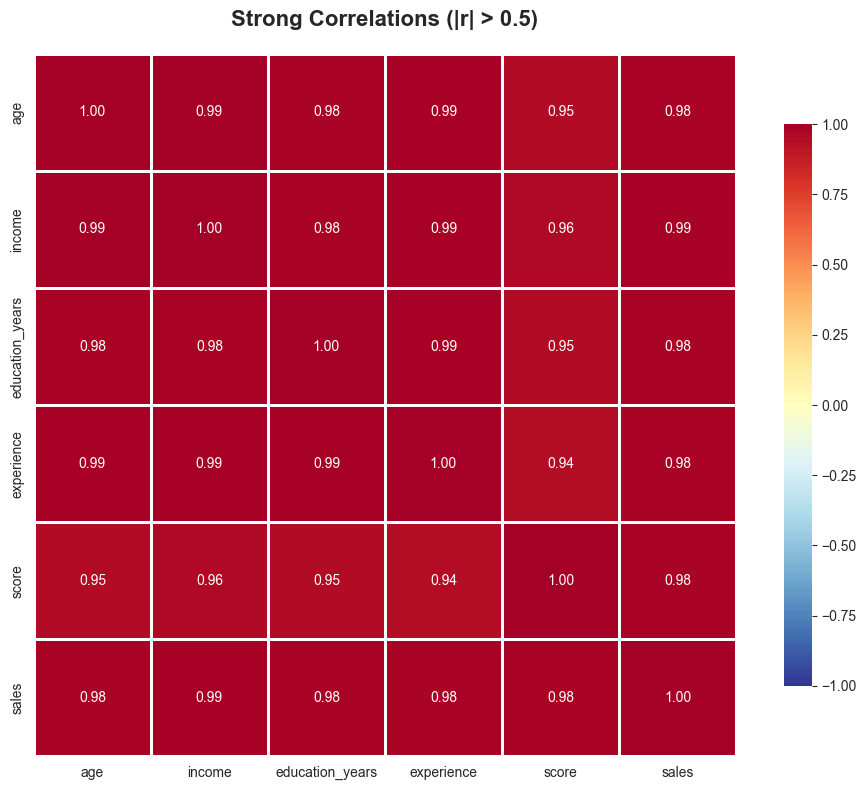

In [7]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Highlight strong correlations (threshold > 0.5)
threshold = 0.5
strong_corr = corr_matrix.copy()
strong_corr[abs(strong_corr) < threshold] = 0

plt.figure(figsize=(10, 8))
sns.heatmap(strong_corr, annot=True, fmt='.2f', cmap='RdYlBu_r',
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, center=0,
            vmin=-1, vmax=1)
plt.title(f'Strong Correlations (|r| > {threshold})', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../images/strong_correlation.png', dpi=300, bbox_inches='tight')
plt.show()
